# Perceptron learning

The perceptron function can take on many functions. In this example we will look at the step function of a linear combination of the inputs. The perceptron function is 

$\hat{y_i} = \begin{cases} -1, & \mbox{if } w^T x_i<0 \\ +1, & \mbox{if } w^T x_i > 0 \end{cases}$

where the predicted class for an instance $i$ is $\hat{y_i}$, the weight vector is $w$ and the features of the instance is $x_i$ and has dimensionality $m$.

There is no closed form solution for determining $w$ thus we use gradient descent to minimize the prediction errors.

In [60]:
class Perceptron(object):
    
    def __init__(self, learning_rate = 1):
        self.learning_rate = learning_rate
        self.w = None
        pass

    def fit(self, x, y):
        shape = x.shape
        # Add a column for the bias term
        x = np.insert(x, 0, 1, axis=1)
        # Initialize the weights all all 1's
        w = np.ones((shape[1]+1,))
    
        learning_rate = self.learning_rate
        iteration = 0
        loss = None
        while iteration <= 1000 and loss != 0:
            for ix, i in enumerate(x):
                pred = np.dot(i,w)
                if pred > 0: pred = 1
                elif pred < 0: pred = -1
                if pred != y[ix]: 
                    w -= learning_rate * pred * i

            loss = np.dot(x, w)
            loss[loss<0] = -1
            loss[loss>0] = 1
            loss = np.sum(loss - y)

            if iteration%10 == 0: learning_rate /= 2
            iteration += 1    
        print('Weights: ', w)
        print('Loss: ', loss)
        self.w = w
        
    def score(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        pred = np.dot(x, self.w)
        pred[pred > 0] =  1
        pred[pred < 0] = -1
        return sum(y-pred)
    
    def predict(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        pred = np.dot(x, self.w)
        pred[pred > 0] =  1
        pred[pred < 0] = -1
        return pred

In [61]:
df = np.loadtxt("perceptron.csv", delimiter = ',')
x = df[:,0:-1]
y = df[:,-1]

print('Dataset')
print(df, '\n')

print(x.shape)

clf = Perceptron()
clf.fit(x, y)

print(clf.predict(x, y))
print(y)

Dataset
[[  3.   4.   1.]
 [  2.   3.   1.]
 [  5.   5.   1.]
 [ 10.   9.  -1.]
 [ 11.  11.  -1.]
 [  1.  10.   1.]
 [ 10.   6.  -1.]
 [  7.   3.  -1.]] 

(8, 2)
Weights:  [ 10.   -11.25   9.5 ]
Loss:  0.0
[ 1.  1.  1. -1. -1.  1. -1. -1.]
[ 1.  1.  1. -1. -1.  1. -1. -1.]


## Optimization algorithm

Initialize the weight vector to 0.

$w = [0, 0, ..., 0_{m+1}]$.

Do until convergence:

At each iteration, take a random instance $x_i \in X$ and predict its class $\hat{y}$.

if $\hat{y} == y_i$: $w^{(k+1)} = w^{(k)} + \rho^{(k)}\hat{y_i}x_i$

else: do nothing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_weights(x, y, verbose = 0):
    shape = x.shape
    x = np.insert(x, 0, 1, axis=1)
    w = np.ones((shape[1]+1,))
    weights = []
    
    learning_rate = 10
    iteration = 0
    loss = None
    while iteration <= 1000 and loss != 0:
        for ix, i in enumerate(x):
            pred = np.dot(i,w)
            if pred > 0: pred = 1
            elif pred < 0: pred = -1
            if pred != y[ix]:
                w = w - learning_rate * pred * i
            weights.append(w)    
            if verbose == 1:
                print('X_i = ', i, '    y = ', y[ix])
                print('Pred: ', pred )
                print('Weights', w)
                print('------------------------------------------')
        
        
        loss = np.dot(x, w)
        loss[loss<0] = -1
        loss[loss>0] = 1
        loss = np.sum(loss - y )
        
        if verbose == 1:
            print('------------------------------------------')
            print('------------------------------------------')
            print('------------------------------------------')
            print(np.sum(loss - y ))
            print('------------------------------------------')
            print('------------------------------------------')
            print('------------------------------------------')
        if iteration%10 == 0: learning_rate = learning_rate / 2
        iteration += 1    
    print('Weights: ', w)
    print('Loss: ', loss)
    return w, weights

Import the data from the "perceptron.csv" file and seperate into the feature set, $X$, and the labels, $Y$.

In [3]:
df = np.loadtxt("perceptron.csv", delimiter = ',')
x = df[:,0:-1]
y = df[:,-1]

print('Dataset')
print(df, '\n')

w, all_weights = get_weights(x, y)
x = np.insert(x, 0, 1, axis=1)

pred = np.dot(x, w)
pred[pred > 0] =  1
pred[pred < 0] = -1
print('Predictions', pred)

Dataset
[[  3.   4.   1.]
 [  2.   3.   1.]
 [  5.   5.   1.]
 [ 10.   9.  -1.]
 [ 11.  11.  -1.]
 [  1.  10.   1.]
 [ 10.   6.  -1.]
 [  7.   3.  -1.]] 

Weights:  [  88.5 -114.    98.5]
Loss:  0.0
Predictions [ 1.  1.  1. -1. -1.  1. -1. -1.]


# Plotting results

We can visualize our linear separator by putting the dataset on the plot and drawing the line defined by the weight vector $w$. 

In [4]:
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

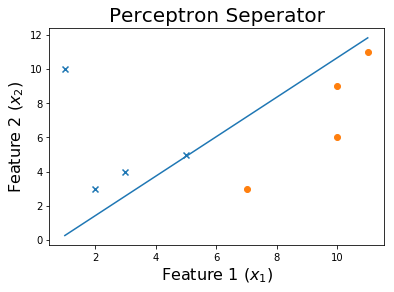

In [5]:
x1 = np.linspace(np.amin(x[:,1]),np.amax(x[:,2]),2)
x2 = np.zeros((2,))
for ix, i in enumerate(x1):
    x2[ix] = (-w[0] - w[1]*i) / w[2]

plt.scatter(x[y>0][:,1], x[y>0][:,2], marker = 'x')
plt.scatter(x[y<0][:,1], x[y<0][:,2], marker = 'o')
plt.plot(x1,x2)
plt.title('Perceptron Seperator', fontsize=20)
plt.xlabel('Feature 1 ($x_1$)', fontsize=16)
plt.ylabel('Feature 2 ($x_2$)', fontsize=16)
plt.show()

Weights: [ 1.  1.  1.]
$0 = -1.0 - 1.0x_1 - 1.0x_2$


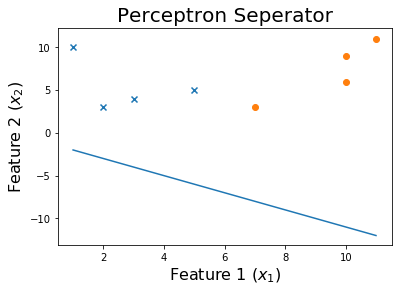

Weights: [ 16. -39.  71.]
$0 = -16.0 - -39.0x_1 - 71.0x_2$


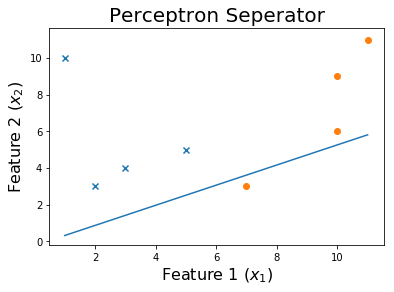

Weights: [ 16. -99.  26.]
$0 = -16.0 - -99.0x_1 - 26.0x_2$


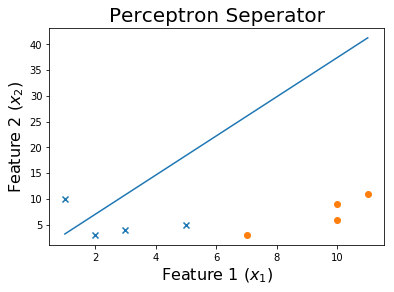

Weights: [ 26. -99.  41.]
$0 = -26.0 - -99.0x_1 - 41.0x_2$


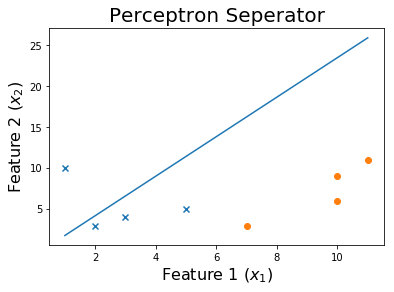

Weights: [ 36. -94.  61.]
$0 = -36.0 - -94.0x_1 - 61.0x_2$


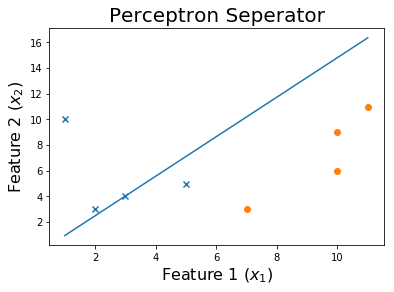

Weights: [ 46. -79.  86.]
$0 = -46.0 - -79.0x_1 - 86.0x_2$


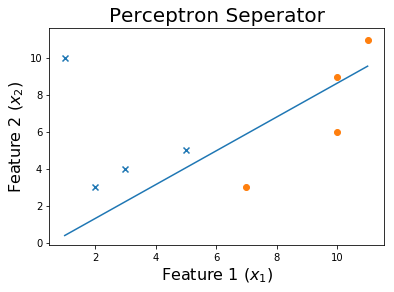

Weights: [  46. -144.   31.]
$0 = -46.0 - -144.0x_1 - 31.0x_2$


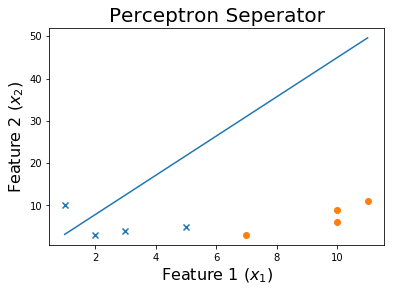

Weights: [  56. -149.   36.]
$0 = -56.0 - -149.0x_1 - 36.0x_2$


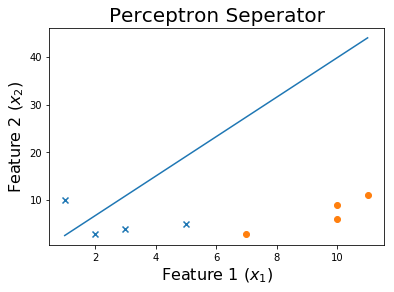

Weights: [  71. -139.   61.]
$0 = -71.0 - -139.0x_1 - 61.0x_2$


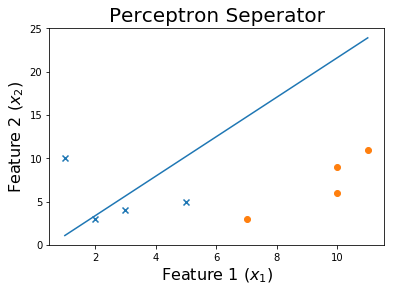

Weights: [  83.5 -134.    76. ]
$0 = -83.5 - -134.0x_1 - 76.0x_2$


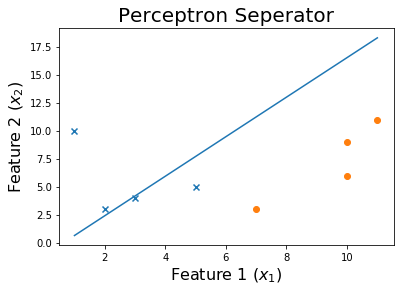

Weights: [  88.5 -114.    98.5]
$0 = -88.5 - -114.0x_1 - 98.5x_2$


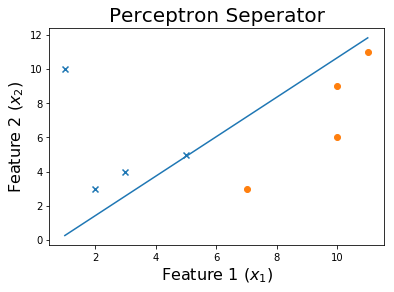

In [6]:
all_weights

for ix, w in enumerate(all_weights):
    if ix % 10 == 0:
        print('Weights:', w)
        x1 = np.linspace(np.amin(x[:,1]),np.amax(x[:,2]),2)
        x2 = np.zeros((2,))
        for ix, i in enumerate(x1):
            x2[ix] = (-w[0] - w[1]*i) / w[2]
        print('$0 = ' + str(-w[0]) + ' - ' + str(w[1]) + 'x_1'+ ' - ' + str(w[2]) + 'x_2$')
        
        plt.scatter(x[y>0][:,1], x[y>0][:,2], marker = 'x')
        plt.scatter(x[y<0][:,1], x[y<0][:,2], marker = 'o')
        plt.plot(x1,x2)
        plt.title('Perceptron Seperator', fontsize=20)
        plt.xlabel('Feature 1 ($x_1$)', fontsize=16)
        plt.ylabel('Feature 2 ($x_2$)', fontsize=16)
        plt.show()